In [2]:
import torch
from torch import cuda
from scheduler import CustomScheduler
from model import EAST

In [6]:

model = EAST()
model.to("cuda" if cuda.is_available() else "cpu")
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

# Step LR의 학습률을 2번 하락으로 변경
scheduler_params = {
    "optimizer": optimizer,
    "T_max": 10,
    "eta_min": 0.00001,
    "verbose": False,
}
# CustomScheduler로 설정
scheduler = CustomScheduler(
    scheduler_name="CosineAnnealingLR", params=scheduler_params
)

In [7]:
lrs = []
for epoch in range(30):
    for i in range(13):
        optimizer.zero_grad()
        optimizer.step()
    scheduler.step()
    current_lr = optimizer.param_groups[0]["lr"]
    lrs.append(current_lr)

In [8]:
import matplotlib.pyplot as plt

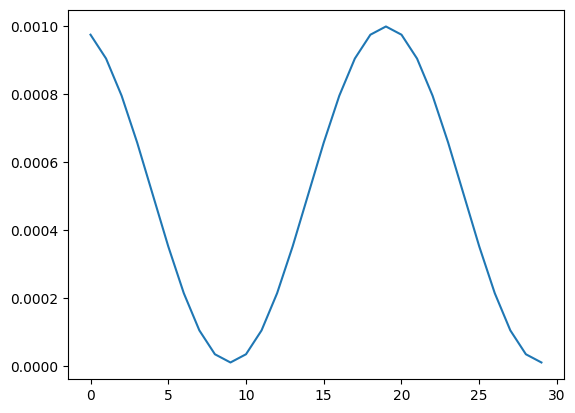

In [9]:
fig, ax = plt.subplots()
ax.plot(lrs)
plt.show()